# **Welcome to the Jupyter notebook showing programmatically discovery and access of WHOS data**

This notebook is used to programmatically access WHOS DAB functionalities, in this case through the OGC OM-JSON based API, documented and available for tests also here: https://whos.geodab.eu/gs-service/om-api

The WHOS portal can also be used to help debug your python notebook: https://whos.geodab.eu/gs-service/whos/search.html

## **Step 1: Install dab-py**

The Python client library `dab-py` is available on PyPI and GitHub: https://github.com/ESSI-Lab/dab-py

In [1]:
!pip install --upgrade dab-py

  Attempting uninstall: dab-py
    Found existing installation: dab_py 0.3.0
    Uninstalling dab_py-0.3.0:
      Successfully uninstalled dab_py-0.3.0



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


## **Step 2: The main code**

### **2.1: Import Library**
Import the main `dabpy` library to access WHOS API `om_api` functionalities.

In [2]:
from dabpy import *
from IPython.display import display

### **2.2: Initialize WHOS Client (Token & View)**
Replace with your WHOS API token and optional view. This initializes the client to interact with the WHOS API.

As a prerequisite to obtain programmatically access to WHOS, a token is required. It can be obtained after registration at https://whos.geodab.eu/gs-service/whos/registration.html.

In [3]:
# Replace with your WHOS API token and optional view
token = "whos-2bbd201b-9908-44b6-ad5c-e3b9a6e3bcda"  # replace with your actual token
view = "whos"
client = WHOSClient(token=token, view=view)

### **2.3: Define Feature Constraints**
Feature retrieval in the WHOS API can be restricted using optional constraints.

#### 2.3.1: Default: Spatial Constraints *(bounding box)*
Set the geographic bounding box for spatial queries. The example uses a region in Finland.

In [4]:
# Define bounding box coordinates (south, west, north, east)
south = 60.347
west = 22.438
north = 60.714
east = 23.012

In this example, only spatial constraints are applied, while the other filters remain optional.

In [5]:
# Create feature constraints
constraints = Constraints(bbox = (south, west, north, east))

#### 2.3.2: Optional: Other Constraints
Additional optional constraints can be applied to further filter the results: 
- **Observed property** : filter features based on the type of measurement or variable, such as water level, precipitation, discharge, etc. 
- **Ontology** : specify which ontology to use to expand the observed property search term or URI with synonyms and related narrower concepts. Two ontologies are available: `whos` and `his-central`.
- **Country**: using Country code (ISO3).
- **Provider**: data provider identifier.
- The other constraints are listed from the documented API https://whos.geodab.eu/gs-service/om-api/

If optional constraints are specified, update the code with details:

In [6]:
'''
constraints = Constraints(
    bbox = (south, west, north, east),
    observedProperty = "example_property",
    ontology = "example_ontology",
    country = "example_country",
    provider = "example_provider"
)
'''

'\nconstraints = Constraints(\n    bbox = (south, west, north, east),\n    observedProperty = "example_property",\n    ontology = "example_ontology",\n    country = "example_country",\n    provider = "example_provider"\n)\n'

### **2.4: GET `Features`**

#### 2.4.1: Retrieve features as Python objects
Fetch features from the WHOS API URL as Python `Feature` objects using the previously defined constraints.

In [6]:
# 01.1: Get Features as Python objects
features = client.get_features(constraints)

Retrieving https://whos.geodab.eu/gs-service/services/essi/token/***/view/whos/om-api/features?west=22.438&south=60.347&east=23.012&north=60.714


#### 2.4.2: Optionally, convert them to a **Pandas DataFrame**
Convert the retrieved `Features` into a Pandas DataFrame for easier inspection, filtering, and analysis.

In [7]:
# 01.1: (optional: Convert Features to DataFrame if needed)
features_df = client.features_to_df(features)
if features_df is not None:
    display(features_df)

,ID,Name,Coordinates,Source,Identifier,Contact Name,Contact Email
0,31448B1B7B67AD32B4F450CB6C217B7AA079D50C,Paimion Vähäjoki,"22.68391584070042, 60.46148465783341","Finland, Finnish Environment Insitute (SYKE)",urn:syke:station:2701400,,
1,4E5A0922A31F68F68BEE64489F077C99BDB00702,Juvankoski,"22.759206037830417, 60.57598973688669","Finland, Finnish Environment Insitute (SYKE)",urn:syke:station:2700250,,
2,6ADE79FCC962E36DCD9857ED7935789B6DA92038,Juvankoski,"22.74873783448396, 60.574586669518666","Finland, Finnish Environment Insitute (SYKE)",urn:syke:station:27802,,
3,92BF791D616E6C8BB8A28E292C0B8E618B498219,Paimionjoki - Aurajoki,"22.67717765096955, 60.563709279270064","Finland, Finnish Environment Insitute (SYKE)",urn:syke:station:2700370,,
4,9413350CE1DF751D17223F864EC4C9FA33BBC64E,"Hypöistenkoski, Aura","22.59757716599028, 60.651063911497864","Finland, Finnish Environment Insitute (SYKE)",urn:syke:station:2800300,,
5,9BF77C8F1023663A8331D01697A08665A747AC9E,JUVANKOSKI,"22.75919965, 60.57598707",GRDC open,https://portal.grdc.bafg.de/KiWIS/KiWIS/1583627,,
6,AB595D4F96AF7FE4D038CBC56026A4E11A11762D,Juntola,"22.702744052828233, 60.53970953727093","Finland, Finnish Environment Insitute (SYKE)",urn:syke:station:2700350,,


### **2.5: GET `Observations`**

#### 2.5.1: Retrieve observations as Python objects. 

Here, select one feature (specific station) to retrieve its available observations, `features[4]` means:
- feature_used ... we take the 5th feature (station) in the 'features' list (index 4)
- feature_id ... then we access its unique identifier (id), required by the API

In [14]:
# 02.1: Get Observations as Python objects
feature_used = features[4]
feature_id = feature_used.id
observations = client.get_observations(feature_id)

Retrieving https://whos.geodab.eu/gs-service/services/essi/token/***/view/whos/om-api/observations?feature=9413350CE1DF751D17223F864EC4C9FA33BBC64E


#### 2.5.2: Optionally, convert them to a **Pandas DataFrame**
Convert the retrieved `Observations` into a Pandas DataFrame for easier inspection, filtering, and analysis.

In [10]:
# 02.2: (optional: Convert Observations to DataFrame if needed)
observations_df = client.observations_to_df(observations)
if observations_df is not None:
    display(observations_df)

,ID,Source,Observed Property Definition,Original Observed Property,Observed Property,Phenomenon Time Begin,Phenomenon Time End,Feature of Interest Href,Observation Type,Unit of Measurement,Interpolation Type
0,urn:uuid:abd64de5-97ed-4840-91a0-2b75b017510c,"Finland, Finnish Environment Insitute (SYKE)",Water level W [cm],None,Vedenkorkeus,1943-07-01T00:00:00Z,2025-12-19T12:10:03Z,9413350CE1DF751D17223F864EC4C9FA33BBC64E,TimeSeriesObservation,cm,None
1,urn:uuid:a8d5c50f-59a3-417c-81c1-24cd59121584,"Finland, Finnish Environment Insitute (SYKE)",Discharge Q [m3/s],None,Virtaama,1943-07-01T00:00:00Z,2025-12-19T12:10:04Z,9413350CE1DF751D17223F864EC4C9FA33BBC64E,TimeSeriesObservation,m3/s,None


### **2.6: Get the Data Points**
#### 2.6.1: Retrieve Observation With Data Points

Retrieve the full time-series data for a selected observation within a specified time range. It shows the actual code that retrieves the data, to separate the action (API call) from what to do next with the data.

In [ ]:
# 03.1: Get first observation with data points
obs_with_data = client.get_observation_with_data(observations[0].id, begin="2025-01-01T00:00:00Z", end="2025-02-01T00:00:00Z")

Retrieving https://whos.geodab.eu/gs-service/services/essi/token/***/view/whos/om-api/observations?includeData=true&observationIdentifier=urn%3Auuid%3Aabd64de5-97ed-4840-91a0-2b75b017510c&beginPosition=2025-01-01T00%3A00%3A00Z&endPosition=2025-02-01T00%3A00%3A00Z


#### 2.6.2: (optional) Convert to DataFrame for analysis

The returned data can be plotted or further analyzed as needed.

In [ ]:
# 03.2: (optional: Convert Observation Points to DataFrame if needed)
if obs_with_data:
    obs_points_df = client.points_to_df(obs_with_data)
    display(obs_points_df)
else:
    print("No observation data available for the requested time range.")

,Time,Value
0,2025-02-01T00:00:00Z,111
1,2025-01-31T00:00:00Z,134
2,2025-01-30T00:00:00Z,168
3,2025-01-29T00:00:00Z,127
4,2025-01-28T00:00:00Z,102
5,2025-01-27T00:00:00Z,112
6,2025-01-26T00:00:00Z,118
7,2025-01-25T00:00:00Z,86
8,2025-01-24T00:00:00Z,75
9,2025-01-23T00:00:00Z,74


#### 2.6.3: (Optional) Example of Graphical Time-Series
This step demonstrates visualization, which is a different action from simply retrieving or tabulating data.  

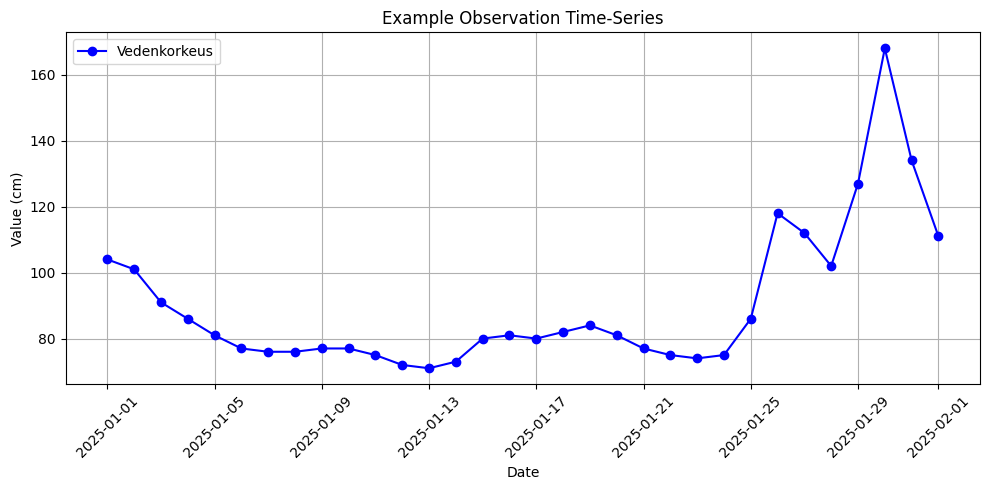

In [ ]:
# 03.3: (optional: Example of Graphical Time-Series)
if obs_with_data:
    client.plot_observation(obs_with_data, feature=feature_used)
else:
    print("No observation data available for the requested time range.")